# LA-ConGA Physics 2022

# Módulo de Datos

Estudiante: Oscar, Altuve Pabón

Mattermost: @altuos
### Tarea 2. Ejercicio 1.

Utilizando el arreglo de puntos de la lámina 39:
1.	Construir una función $\chi^2(p_0,p_1)$ correspondiente a un modelo lineal $y=p_0+p_1x$;
2.	Asignar valores numéricos iniciales “razonables” a $p_0$ y $p_1$;
3.	Determinar (p.e. con una doble bucle) los valores $\hat{p_0}$ y $\hat{p_1}$ que minimizan la función $\chi^2$;
4.	Fijando el valor $\hat{p_0}$, graficar la variación de $\chi^2$ en función de $p_1$ alrededor de su valor mínimo;
5.	Fijando el valor de $\hat{p_1}$, graficar la variación de $\chi^2$ en función de $p_0$ alrededor de un valor mínimo;
6.	En ambos casos, determinar los intervalos correspondientes a $\Delta\chi^2<1$;
7.	Comparar con el resultado indicado en la lámina siguiente;
8.	Evaluar la p-value, e interpretar su valor;
9.	Comparar con el resultado producido por tu herramienta favorita, e interpretar las posibles diferencias.

In [1]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [2]:
gStyle->SetOptTitle (0/1); // sin título
gStyle->SetOptStat(0); // No muestra estadística

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",10,10,900,600);
c1->SetGrid();

In [4]:
TH1D *h_data = new TH1D("h_data","h_data",10,0,10);

In [5]:
h_data->SetBinContent(1, 157);
h_data->SetBinContent(2, 135);
h_data->SetBinContent(3, 121);
h_data->SetBinContent(4, 104);
h_data->SetBinContent(5, 86);
h_data->SetBinContent(6, 71);
h_data->SetBinContent(7, 83);
h_data->SetBinContent(8, 90);
h_data->SetBinContent(9, 67);
h_data->SetBinContent(10, 86);

In [ ]:
// https://root.cern/root/html534/tutorials/math/chi2test.C.html

In [15]:
float chi2(float xi, int n, float p0, float p1) {
    float y = p0+p1*xi;
    float sum = 0;
    float sigmai = 1; // definir!!!!!
    for (int i=0; i <= n; i++) {
        float sum = sum + (xi-y)/sigmai;
    }
    return sum;
}

In [ ]:
float p1 = 1;
float p2 = 1;
int n = 9;
GetBincontent
// cout << chi2() << endl;

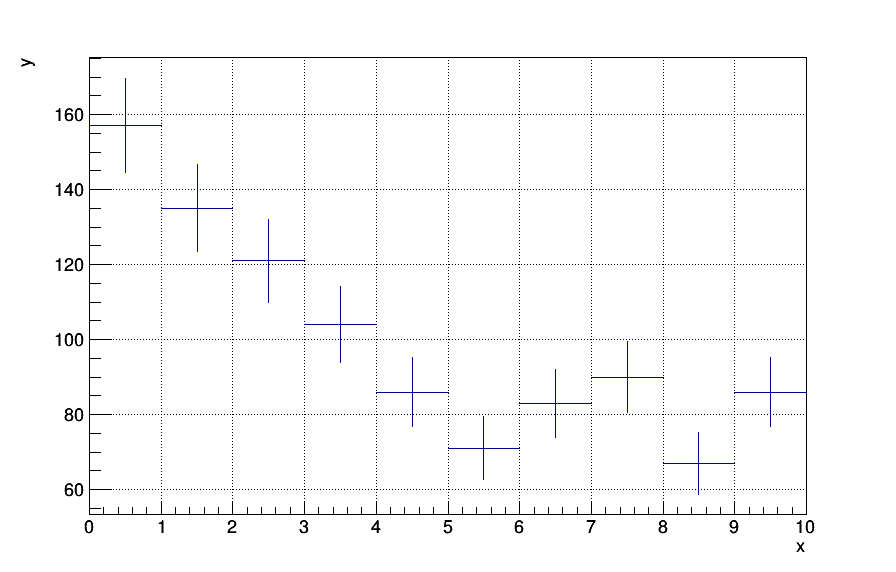

In [6]:
h_data->GetXaxis()->SetTitle("x");
h_data->GetYaxis()->SetTitle("y");
h_data->Draw("e");
c1->Draw();